In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
import numpy as np  
from scipy.stats import rankdata
from scipy import stats
import sys

## Ranking across experiments

Load the time/pulsed experiments

In [91]:
# time_fast_decay_df = pd.read_csv('../dataframes/fast_decay_time_ranking.csv') # this isn't super relevant - we're not using it
time_medium_decay_df = pd.read_csv('../dataframes/medium_decay_time_ranking.csv')
time_slow_decay_df = pd.read_csv('../dataframes/slow_decay_time_ranking.csv')
print(time_medium_decay_df.shape)
time_medium_decay_df.head()

(23, 8)


,Unnamed: 0,intervention_name,algorithm,decay,total_cell_count,time_to_85,cell_count_rank,time_rank
0,EG_Ceramide_S1P_1_2,Ceramide->S1P=1,EG,2,199347.000000,672.0,9.0,15.0
1,EG_GAP_RAS_1_2,GAP->RAS=1,EG,2,652774.666667,1008.0,22.0,22.0
2,EG_IL15_GAP_0_2,IL15->GAP=0,EG,2,667846.000000,1092.0,23.0,23.0
3,EG_IL2RBT_IL2RB_0_2,IL2RBT->IL2RB=0,EG,2,633734.666667,612.0,19.0,12.5
4,EG_IL2RB_MCL1_0_2,IL2RB->MCL1=0,EG,2,609459.333333,576.0,17.0,11.0


Load the spatial experiment

In [92]:
space_cell_measure_ranking_df = pd.read_csv('../dataframes/spatial_cell_measures_rankings.csv')
print(space_cell_measure_ranking_df.shape)
space_cell_measure_ranking_df.head()

(23, 10)


,Unnamed: 0,Max cell count,Time at max cell count,Final cell count,Time to 85% population,Time at max cell count rank,Final cell count rank,Time to 85% population rank,steady_state_cell_count,cell_count_rank
0,EG_Ceramide_S1P_1_11,1367,264.0,885,552.0,19.5,20.5,15.0,106632.0,20.0
1,EG_GAP_RAS_1_11,1373,300.0,884,720.0,21.5,19.0,22.0,107269.0,23.0
2,EG_IL15_GAP_0_11,1398,444.0,887,804.0,23.0,23.0,23.0,106486.0,19.0
3,EG_IL2RBT_IL2RB_0_11,1360,156.0,873,480.0,12.0,3.5,12.0,105573.0,9.0
4,EG_IL2RB_MCL1_0_11,1362,108.0,880,420.0,10.5,12.5,11.0,105554.0,7.0


Load the time and spatial experiment

In [93]:
# time_fast_clearance_df = pd.read_csv('../dataframes/fast_clearance_time_ranking.csv')
time_medium_clearance_df = pd.read_csv('../dataframes/medium_clearance_time_ranking.csv')
time_slow_clearnce_df = pd.read_csv('../dataframes/slow_clearance_time_ranking.csv')

time_medium_clearance_df.head()

,Unnamed: 0,intervention_name,algorithm,decay,steady_state_cell_count,time_to_85,cell_count_rank,time_rank
0,EG_Ceramide_S1P_1_2,Ceramide->S1P=1,EG,2,296709.0,756.0,8.0,16.0
1,EG_GAP_RAS_1_2,GAP->RAS=1,EG,2,313664.0,2268.0,23.0,21.0
2,EG_IL15_GAP_0_2,IL15->GAP=0,EG,2,306937.0,3792.0,20.0,23.0
3,EG_IL2RBT_IL2RB_0_2,IL2RBT->IL2RB=0,EG,2,304890.0,612.0,16.0,12.5
4,EG_IL2RB_MCL1_0_2,IL2RB->MCL1=0,EG,2,305556.0,540.0,17.0,11.0


/Users/JohnMetzcar/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


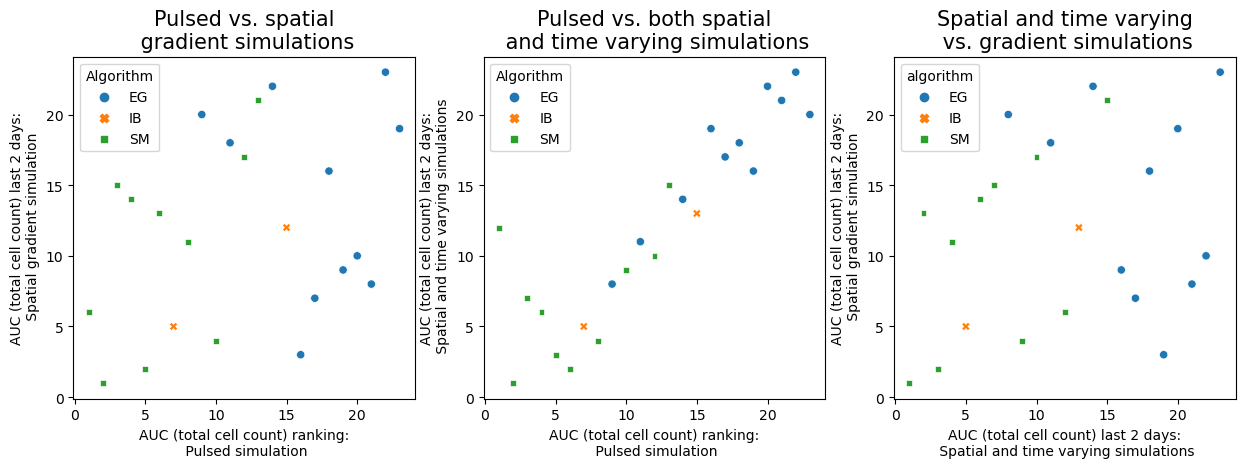

In [94]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#0
sns.scatterplot(x=time_medium_decay_df['cell_count_rank'], y=space_cell_measure_ranking_df['cell_count_rank'], ax=ax[0], 
                style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[0].set_title('Pulsed vs. spatial\n gradient simulations', fontsize=15)
ax[0].set_xlabel('AUC (total cell count) ranking:\n Pulsed simulation')
ax[0].set_ylabel('AUC (total cell count) last 2 days:\n Spatial gradient simulation')
sns.move_legend(ax[0], "upper left", title="Algorithm") # this is setting the location also!!! Be aware!!
ax[0].set_aspect('equal')

#1
sns.scatterplot(x=time_medium_decay_df['cell_count_rank'], y=time_medium_clearance_df['cell_count_rank'], ax=ax[1], 
                style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[1].set_title('Pulsed vs. both spatial\n and time varying simulations', fontsize=15)
ax[1].set_xlabel('AUC (total cell count) ranking:\n Pulsed simulation')
ax[1].set_ylabel('AUC (total cell count) last 2 days:\n Spatial and time varying simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")
ax[1].set_aspect('equal')

#2
sns.scatterplot(time_medium_clearance_df['cell_count_rank'], space_cell_measure_ranking_df['cell_count_rank'], ax=ax[2],
              style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[2].set_title('Spatial and time varying\n vs. gradient simulations', fontsize=15)
ax[2].set_xlabel('AUC (total cell count) last 2 days:\n Spatial and time varying simulations')
ax[2].set_ylabel('AUC (total cell count) last 2 days:\n Spatial gradient simulation')
sns.move_legend(ax[1], "upper left", title="Algorithm")
ax[2].set_aspect('equal')
plt.savefig('../figures/cell_count_rank_comparison.png')

## Timings

/Users/JohnMetzcar/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


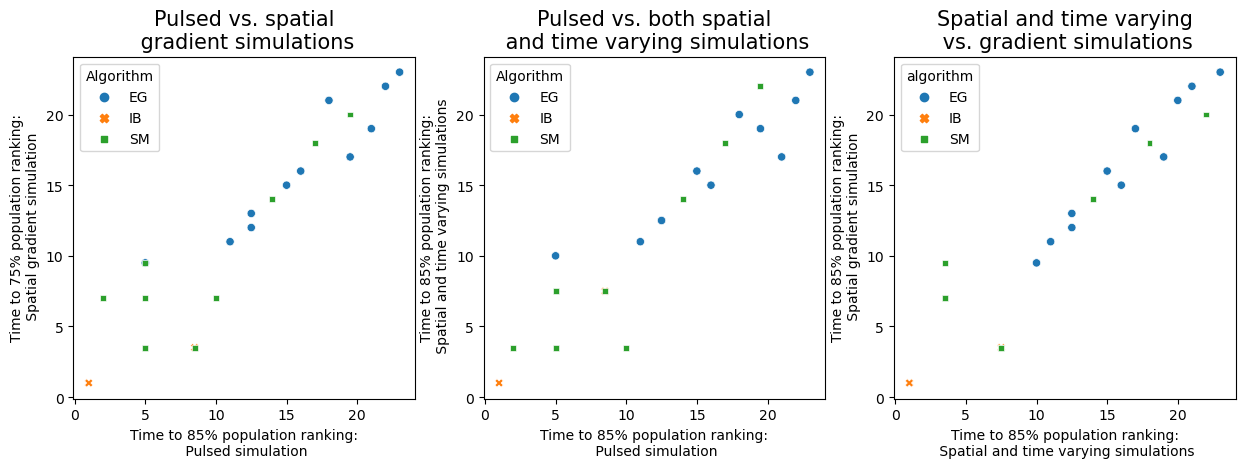

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#0
sns.scatterplot(x=time_medium_decay_df['time_rank'], y=space_cell_measure_ranking_df['Time to 85% population rank'], ax=ax[0], 
                style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[0].set_title('Pulsed vs. spatial\n gradient simulations', fontsize=15)
ax[0].set_xlabel('Time to 85% population ranking:\n Pulsed simulation')
ax[0].set_ylabel('Time to 75% population ranking:\n Spatial gradient simulation')
sns.move_legend(ax[0], "upper left", title="Algorithm") # this is setting the location also!!! Be aware!!
ax[0].set_aspect('equal')

#1
sns.scatterplot(x=time_medium_decay_df['time_rank'], y=time_medium_clearance_df['time_rank'], ax=ax[1], 
                style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[1].set_title('Pulsed vs. both spatial\n and time varying simulations', fontsize=15)
ax[1].set_xlabel('Time to 85% population ranking:\n Pulsed simulation')
ax[1].set_ylabel('Time to 85% population ranking:\n Spatial and time varying simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")
ax[1].set_aspect('equal')

#2
sns.scatterplot(time_medium_clearance_df['time_rank'], space_cell_measure_ranking_df['Time to 85% population rank'], ax=ax[2],
              style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[2].set_title('Spatial and time varying\n vs. gradient simulations', fontsize=15)
ax[2].set_xlabel('Time to 85% population ranking:\n Spatial and time varying simulations')
ax[2].set_ylabel('Time to 85% population ranking:\n Spatial gradient simulation')
sns.move_legend(ax[1], "upper left", title="Algorithm")
ax[2].set_aspect('equal')
plt.savefig('../figures/time_to_percent_decline_rank_comparison.png')